In [17]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

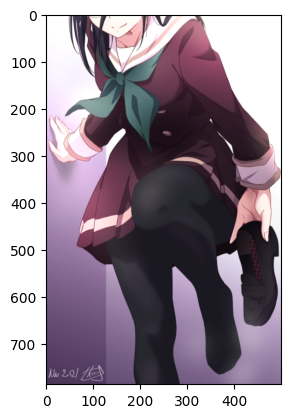

In [18]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# rotate 旋转

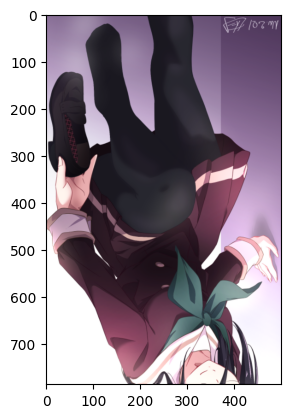

In [19]:
# 180度
image1 = cv2.rotate(image, cv2.ROTATE_180)
plt.imshow(image1)

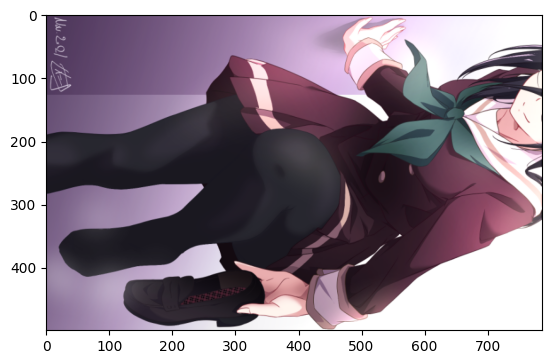

In [20]:
# 顺时针90度
image2 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image2)

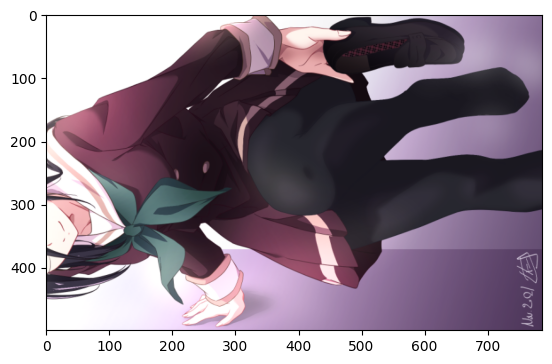

In [21]:
# 逆时针90度
image3 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(image3)

In [22]:
image1.shape

(787, 500, 3)

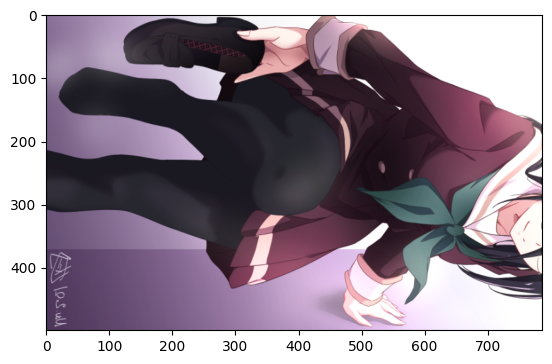

In [23]:
# 转置行列相当于 顺时针90度
image4 = np.transpose(image1, (1, 0, 2))
plt.imshow(image4)

# warpAffine 仿射变换

仿射变换是指在向量空间中进行一次线性变换(乘以一个矩阵)并加上一个平移(加上一个向量)，
变换为另一个向量空间的过程。在有限维的情况下，每个仿射变换可以由一个矩阵A和一个向量
b给出，它可以写作A和一个附加的列b。一个仿射变换对应于一个矩阵和一个向量的乘法，而仿
射变换的复合对应于普通的矩阵乘法，只要加入一个额外的行到矩阵的底下，这一行全部是0除
了最右边是一个1，而列向量的底下要加上一个1.

---

Affine Transform描述了一种二维仿射变换的功能，它是一种二维坐标之间的线性变换，
保持二维图形的“平直性”(即变换后直线还是直线，圆弧还是圆弧)和“平行性”(其实是保持
二维图形间的相对位置关系不变，平行线还是平行线，而直线上的点位置顺序不变，另特别
注意向量间夹角可能会发生变化)。仿射变换可以通过一系列的原子变换的复合来实现包括：
平移(Translation)、缩放(Scale)、翻转(Flip)、旋转(Rotation)和错切(Shear).

In [24]:
h, w, c = image.shape
h, w, c

(787, 500, 3)

## 平移

In [25]:
M = np.float32([[1, 0, 100], [0, 1, 50]])

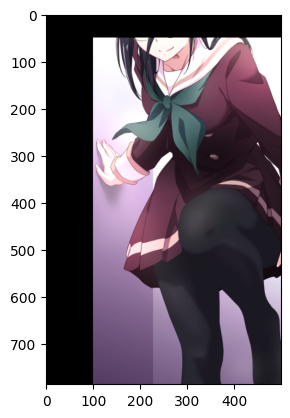

In [26]:
# 放射变换
image4 = cv2.warpAffine(
    src=image,
    M=M,                            # 变换矩阵
    dsize=(w, h),                   # 目标大小
    flags=cv2.INTER_CUBIC,          # 差值算法 INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4
    borderMode=cv2.BORDER_CONSTANT, # 边缘
    borderValue=(0, 0, 0)
)
plt.imshow(image4)

## getRotationMatrix2D 获取旋转矩阵

In [27]:
center      = (w // 2, h // 2)
rotation    = np.random.randint(-45, 45)
center, rotation

((250, 393), -4)

In [28]:
# 获取旋转矩阵
M1 = cv2.getRotationMatrix2D(
    center=center,  # 旋转中心
    angle=rotation, # 角度,逆时针为正数
    scale=1,        # 缩放系数
)
M1

array([[  0.99756405,  -0.06975647,  28.02328162],
       [  0.06975647,   0.99756405, -16.48179019]])

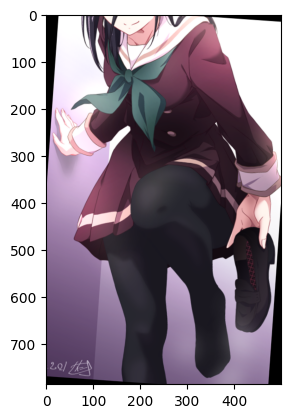

In [29]:
# 放射变换
image5 = cv2.warpAffine(
    src=image,
    M=M1,                            # 变换矩阵
    dsize=(w, h),                   # 目标大小
    flags=cv2.INTER_CUBIC,          # 差值算法 INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4
    borderMode=cv2.BORDER_CONSTANT, # 边缘
    borderValue=(0, 0, 0)
)
plt.imshow(image5)

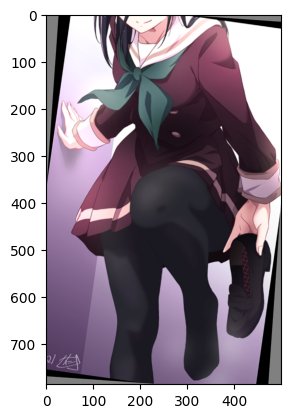

In [30]:
image6 = cv2.warpAffine(
    src=image5,
    M=M1,                            # 变换矩阵
    dsize=(w, h),                   # 目标大小
    flags=cv2.INTER_CUBIC,          # 差值算法 INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4
    borderMode=cv2.BORDER_CONSTANT, # 边缘
    borderValue=(128, 128, 128)
)
plt.imshow(image6)

## getAffineTransform 根据3对坐标点计算变换矩阵

In [31]:
M2 = cv2.getAffineTransform(
    src=np.array([[1, 0],  [20, 5], [5, 20]], dtype=np.float32),
    dst=np.array([[1, 5], [20, 5], [10, 20]], dtype=np.float32),
)
M2

array([[ 0.93055556,  0.26388889,  0.06944444],
       [-0.20833333,  0.79166667,  5.20833333]])

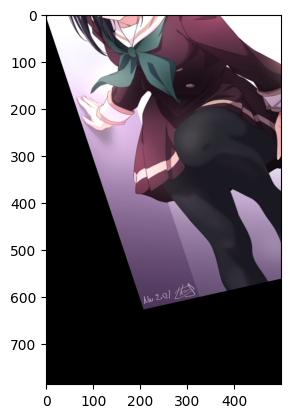

In [32]:
# 仿射变换
image7 = cv2.warpAffine(
    src=image,
    M=M2,                           # 变换矩阵
    dsize=(w, h),                   # 目标大小
    flags=cv2.INTER_CUBIC,          # 差值算法 INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4
    borderMode=cv2.BORDER_CONSTANT, # 边缘
    borderValue=(0, 0, 0)
)
plt.imshow(image7)